# Attributes explanation

```text
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [8]:
df = pd.read_csv("student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [46]:
features = [ "school", "sex", "age", "address", "traveltime", "studytime", "failures", "schoolsup", "famsup", "paid", "activities", "higher", "internet", "romantic", "famrel", "freetime", "goout", "health", "absences", "G1", "G2" ]

In [47]:
X = df[features]
X = pd.get_dummies(X)
y = df["G3"]

In [48]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
y_pred = model.predict(X_valid)

mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)

print(f"MSE:  {mse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.2f}")

MSE:  3.27
MAE:  1.19
R²:   0.82


Text(0.05, 0.95, 'R² = 0.820')

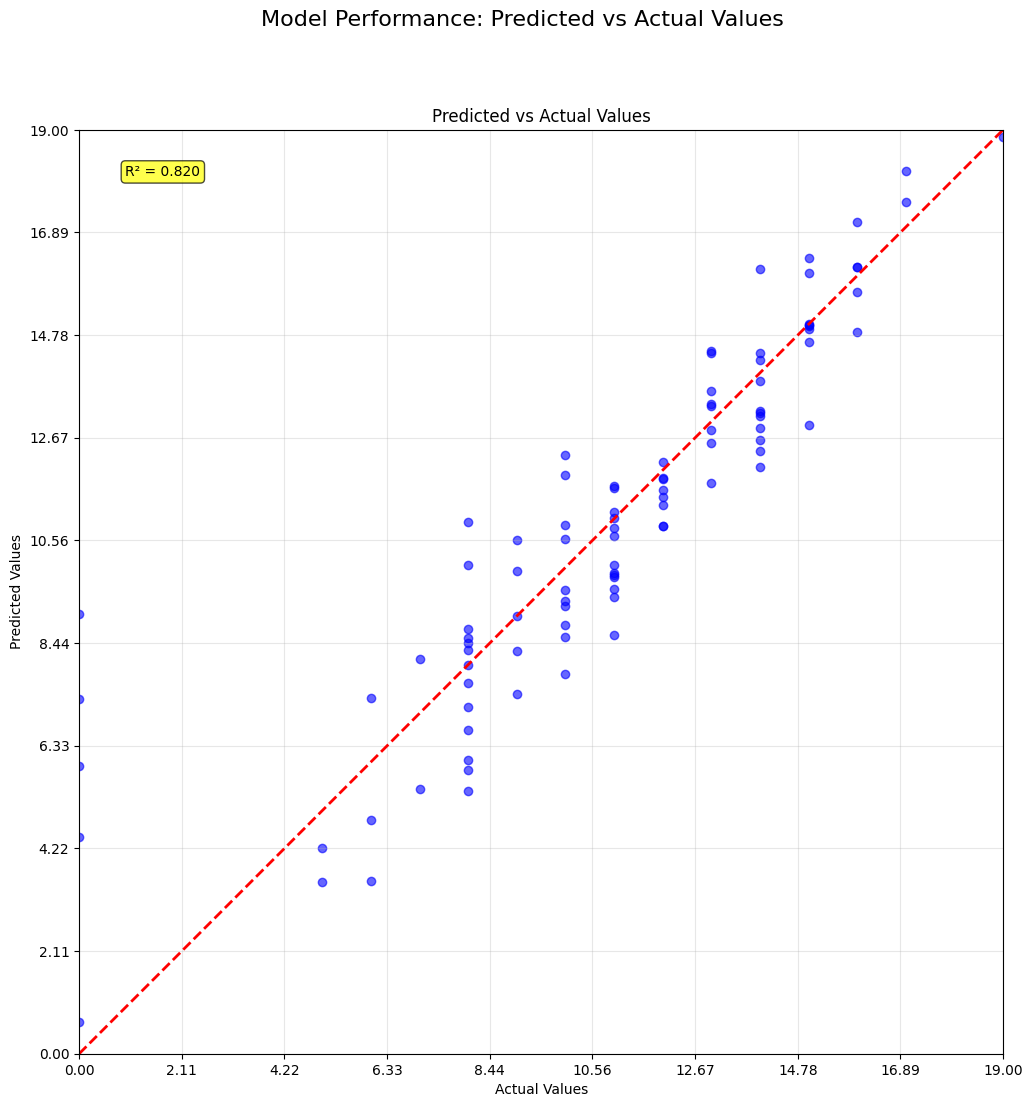

In [58]:
fig, axes = plt.subplots(figsize=(15, 12))
fig.suptitle('Model Performance: Predicted vs Actual Values', fontsize=16)
y_actual = y_valid
y_predicted = y_pred
axes.scatter(y_actual, y_predicted, alpha=0.6, color='blue')
axes.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
axes.set_xlabel('Actual Values')
axes.set_ylabel('Predicted Values')
axes.set_title('Predicted vs Actual Values')
axes.grid(True, alpha=0.3)

axes.set_xlim(y_actual.min(), y_actual.max())
axes.set_ylim(y_actual.min(), y_actual.max())
axes.set_aspect('equal', 'box')
ticks = np.linspace(y_actual.min(), y_actual.max(), 10)
axes.set_xticks(ticks)
axes.set_yticks(ticks)

r2 = r2_score(y_actual, y_predicted)
axes.text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes.transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

In [80]:
predictions = y_pred.tolist()
predictions = pd.Series(predictions)
actual_values = y_valid.tolist()
actual_values = pd.Series(actual_values)
difference = abs(actual_values - predictions)
data_comparison = pd.DataFrame(data={"Predictions": predictions, "Actual Values": actual_values, "Difference":difference})
data_comparison.head(20)

,Predictions,Actual Values,Difference
0,3.541785,6,2.458215
1,18.846643,19,0.153357
2,7.139842,8,0.860158
3,9.561334,11,1.438666
4,13.623938,13,0.623938
5,12.548604,13,0.451396
6,4.804716,6,1.195284
7,17.102389,16,1.102389
8,12.318112,10,2.318112
9,7.314992,6,1.314992
